In [1]:
import pandas as pd
import numpy as np
import spacy
import re

In [2]:
data = pd.read_csv("mbti.csv") 
data.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [3]:
# Create a new row as a dictionary
new_row = {'type': 'ENTP', 'posts': 'a lemma is subsidiary or intermediate theorem in an argument or proof'}

# Convert the dictionary to a DataFrame
new_row_df = pd.DataFrame([new_row])

# Concatenate the new row DataFrame with the original DataFrame
data = pd.concat([new_row_df, data]).reset_index(drop=True)

In [4]:
text = data.iloc[1, 1]  # Extracts the text from the second column of the first row

print(text)

'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

In [16]:
# Load the English language model
nlp = spacy.load('en_core_web_sm')

### Apply tokenization and lemmatization on the text stored in the text variable

In [17]:
# Apply tokenization and lemmatization
# nlp(text) applies tokenization and lemmatization to the text using the spaCy model. The resulting processed text is stored in doc
doc = nlp(text)

# Extract tokens and lemmas
tokens = [token.text for token in doc]
lemmas = [token.lemma_ for token in doc]

print("Tokens:", tokens)


Tokens: ['a', 'lemma', 'is', 'subsidiary', 'or', 'intermediate', 'theorem', 'in', 'an', 'argument', 'or', 'proof']


In [18]:
print("Lemmas:", lemmas)

Lemmas: ['a', 'lemma', 'be', 'subsidiary', 'or', 'intermediate', 'theorem', 'in', 'an', 'argument', 'or', 'proof']


##### We'll use lemmatization to preprocess the posts here. Lemmatization groups together different inflected forms of a word so they can be analyzed as a single item. Lemmatization takes into account the context of the word, making it a more suitable choice for preprocessing. This technique links words with similar meanings to one word, resulting in a more accurate analysis.

In [5]:
# Load spaCy's English model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Function to perform lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

# Function to clean text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|\S+\.com\S+", "", text)

    # Remove multiple spaces
    text = re.sub(r"\s+", " ", text)

    # Convert to lowercase
    text = text.lower()

    # Lemmatize the text
    text = lemmatize_text(text)

    # Remove stopwords and non-words
    doc = nlp(text)
    text = " ".join([token.text for token in doc if token.is_alpha and not token.is_stop])

    # Remove repeating letters (e.g., "looove" becomes "love")
    text = re.sub(r"(.)\1+", r"\1", text)

    return text

In [25]:
df = pd.DataFrame(data)
df

,type,posts,Cleaned_Posts
0,ENTP,a lemma is subsidiary or intermediate theorem ...,lema subsidiary intermediate theorem argument ...
1,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,intj moment sportscenter play life change expe...
2,ENTP,'I'm finding the lack of me in these posts ver...,NaN
3,INTP,'Good one _____ https://www.youtube.com/wat...,NaN
4,INTJ,"'Dear INTP, I enjoyed our conversation the o...",NaN
...,...,...,...
8671,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,NaN
8672,ENFP,'So...if this thread already exists someplace ...,NaN
8673,INTP,'So many questions when i do these things. I ...,NaN
8674,INFP,'I am very conflicted right now when it comes ...,NaN


In [23]:
#before preprocessing

df.iloc[1,1]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [24]:
# Apply text cleaning to the first row of the 'Posts' column
df.loc[1, 'Cleaned_Posts'] = clean_text(df.loc[1, 'posts'])

# Display the cleaned DataFrame
print(df.iloc[1,2])

#After preprocessing

intj moment sportscenter play life change experience repeat perc experience imerse thing infj friend post facebok comit suicide day rest sory hear distres natural relationship perfection time moment existence try figure hard time time growth game set welbrutin thirty minute leg mean sit desk chair wed moderation maybe try edible healthy alternative come item ve determine type whichever type want likely use type cognitive function whatnot leave thing moderation sim video game god note god somewhat subjective completely promote death sim enfp favorite video game grow curent favorite video game apear late think confidence god cherish time solitude b c revel iner world time workin enjoy time wory people entp lady complimentary personality main social outlet xbox live conversation verbaly fatigue dig thread require high backyard roast eat marshmelow backyard converse intelectual folow masage b sentence think watch movie corner health clas clearly teach per host baby der left right munching 

###### for the type column

Assign a value of 1 to individuals who possess the traits of Introversion (I), Intuition (N), Thinking (T), and Judging (J) on the four axes of the Myers-Briggs Type Indicator (MBTI) - Introversion-Extraversion (IE), Intuition-Sensing (NS), Feeling-Thinking (FT), and Judging-Perceiving (JP). All other individuals are assigned a value of 0.

This will allow us to calculate the number of posts that correspond to introverted individuals versus extroverted individuals out of all the entries in the labeled dataset


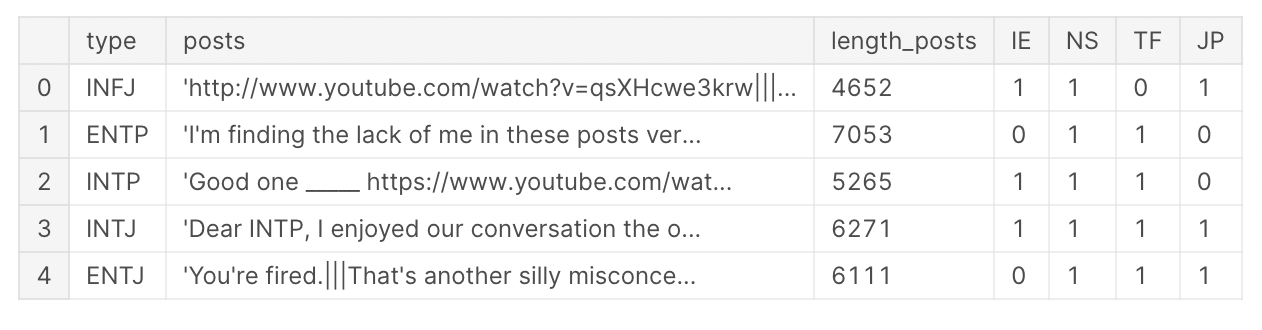